In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

In [3]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

In [7]:
df_train = pd.read_csv('final_train.csv')
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df_test = pd.read_csv('final_test.csv')
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y


In [8]:
len(df_train)

614

In [9]:
len(df_test)

367

In [10]:
# List of columns with null values in training data
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
# List of columns with null values in testing data
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
X_train, X_test, y_train, y_test = df_train.iloc[:,1:-1], df_test.iloc[:,1:-1], df_train.iloc[:,-1], df_test.iloc[:,-1]

In [13]:
X_train.shape

(614, 11)

In [14]:
y_train.shape

(614,)

In [15]:
X_test.shape

(367, 11)

In [16]:
y_test.shape

(367,)

In [17]:
# List of columns in training data with null values
col_null_train = X_train.columns[X_train.isnull().any()].tolist()
# Impute the missing values with mode statistic of each column
for i in col_null_train:
    X_train[i] = X_train[i].fillna(X_train[i].dropna().mode().values[0])

In [18]:
# List of columns in testing data with null values
col_null_test = X_test.columns[X_test.isnull().any()].tolist()
# Impute the missing values with mode statistic of each column
for i in col_null_test:
    X_test[i] = X_test[i].fillna(X_test[i].dropna().mode().values[0])

In [19]:
# Pre-processing the data

# Converting 'Dependents' column into 'int' data type
X_train['Dependents'] = X_train['Dependents'].str.rstrip('+').astype(np.int)
X_test['Dependents'] = X_test['Dependents'].str.rstrip('+').astype(np.int)

# List of columns that need to be encoded
col_encode_list = []
for i in X_train.columns:
    if X_train[i].dtypes == 'O':
        col_encode_list.append(i)

In [20]:
# Encoding the object features
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(X_train[col_encode_list])
X_train[col_encode_list] = ordinal_encoder.transform(X_train[col_encode_list])
X_test[col_encode_list] = ordinal_encoder.transform(X_test[col_encode_list])

In [21]:
# Encoding the target
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

In [22]:
X_train[:5]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0,0.0,0.0,5849,0.0,120.0,360.0,1.0,2.0
1,1.0,1.0,1,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0
2,1.0,1.0,0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0
3,1.0,1.0,0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0
4,1.0,0.0,0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0


In [23]:
X_test.dtypes

Gender               float64
Married              float64
Dependents             int32
Education            float64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
dtype: object

In [24]:
# Display Correlation Matrix
train_dataset = X_train
train_dataset['Loan Status'] = y_train

In [25]:
corr_matrix = train_dataset.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

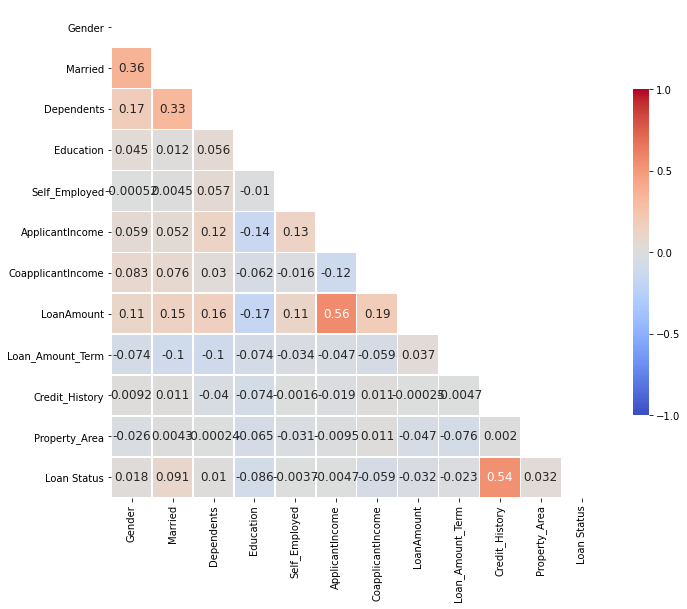

In [26]:
f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [39]:
# Scale the features
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [41]:
# Apply PCA analysis
pca = PCA(n_components=5) 
X_train_pca = pca.fit_transform(X_train_std) 
X_test_pca = pca.transform(X_test_std)

In [42]:
# Initialize the ML models
forest = RandomForestClassifier(n_estimators =400, criterion='entropy', oob_score=True, random_state=1,n_jobs=-1)
tree = DecisionTreeClassifier(criterion='entropy',max_depth=1)
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=0.1, random_state=0)
xgb1 = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=8, min_child_weight=6, gamma=0.1, subsample=0.9,
                     colsample_bytree=0.95,reg_alpha=2, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [43]:
# Random Forest Results

In [44]:
# With PCA
forest.fit(X_train_pca, y_train)
y_test_pred = forest.predict(X_test_pca)
print(f1_score(y_test, y_test_pred, average='binary'))
print(accuracy_score(y_test, y_test_pred))

0.9538461538461539
0.9264305177111717


In [45]:
# Without PCA
forest.fit(X_train_std, y_train)
y_test_pred = forest.predict(X_test_std)
print(f1_score(y_test, y_test_pred, average='binary'))
print(accuracy_score(y_test, y_test_pred))

0.9866220735785953
0.9782016348773842


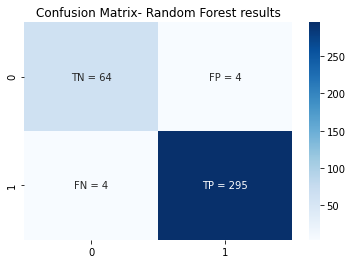

In [46]:
tn, fp, fn, tp = confusion_matrix(y_test,y_test_pred).ravel()
matrix_hyper = np.array([[tn, fp], [fn, tp]])
label_hyper = ['TN = %d' % (tn), 'FP = %d' % (fp),'FN = %d' % (fn),'TP = %d' % (tp)]
label_hyper = np.asarray(label_hyper).reshape(2,2)
ax = plt.axes()
sns.heatmap(matrix_hyper, annot=label_hyper, fmt="", cmap='Blues')
ax.set_title('Confusion Matrix- Random Forest results')
plt.show()

In [ ]:
# AdaBoost Results

In [47]:
# With PCA
ada.fit(X_train_pca, y_train)
y_test_pred = ada.predict(X_test_pca)
print(f1_score(y_test, y_test_pred, average='binary'))
print(accuracy_score(y_test, y_test_pred))

0.9629629629629629
0.9400544959128065


In [48]:
# Without PCA
ada.fit(X_train_std, y_train)
y_test_pred = ada.predict(X_test_std)
print(f1_score(y_test, y_test_pred, average='binary'))
print(accuracy_score(y_test, y_test_pred))

0.979933110367893
0.9673024523160763


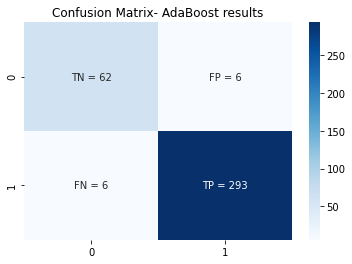

In [49]:
tn, fp, fn, tp = confusion_matrix(y_test,y_test_pred).ravel()
matrix_hyper = np.array([[tn, fp], [fn, tp]])
label_hyper = ['TN = %d' % (tn), 'FP = %d' % (fp),'FN = %d' % (fn),'TP = %d' % (tp)]
label_hyper = np.asarray(label_hyper).reshape(2,2)
ax = plt.axes()
sns.heatmap(matrix_hyper, annot=label_hyper, fmt="", cmap='Blues')
ax.set_title('Confusion Matrix- AdaBoost results')
plt.show()

In [ ]:
# XGBoost Results

In [50]:
# With PCA
xgb1.fit(X_train_pca, y_train)
y_test_pred = xgb1.predict(X_test_pca)
print(f1_score(y_test, y_test_pred, average='binary'))
print(accuracy_score(y_test, y_test_pred))

0.9281961471103327
0.888283378746594


In [51]:
# Without PCA
xgb1.fit(X_train_std, y_train)
y_test_pred = xgb1.predict(X_test_std)
print(f1_score(y_test, y_test_pred, average='binary'))
print(accuracy_score(y_test, y_test_pred))

0.9689655172413794
0.9509536784741145


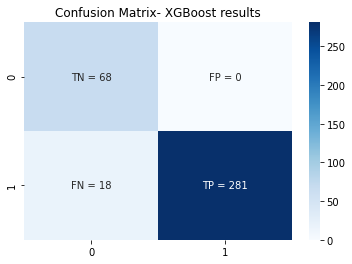

In [52]:
tn, fp, fn, tp = confusion_matrix(y_test,y_test_pred).ravel()
matrix_hyper = np.array([[tn, fp], [fn, tp]])
label_hyper = ['TN = %d' % (tn), 'FP = %d' % (fp),'FN = %d' % (fn),'TP = %d' % (tp)]
label_hyper = np.asarray(label_hyper).reshape(2,2)
ax = plt.axes()
sns.heatmap(matrix_hyper, annot=label_hyper, fmt="", cmap='Blues')
ax.set_title('Confusion Matrix- XGBoost results')
plt.show()

In [ ]:
# Ensemble Model Results

In [59]:
eclf = VotingClassifier(estimators=[('forest', forest), ('xgb', xgb1), ('adaboost', ada)], voting='hard')

In [60]:
# With PCA
eclf.fit(X_train_pca, y_train)
y_test_pred = eclf.predict(X_test_pca)
print(f1_score(y_test, y_test_pred, average='binary'))
print(accuracy_score(y_test, y_test_pred))

0.9574105621805792
0.9318801089918256


In [61]:
# Without PCA
eclf.fit(X_train_std, y_train)
y_test_pred = eclf.predict(X_test_std)
print(f1_score(y_test, y_test_pred, average='binary'))
print(accuracy_score(y_test, y_test_pred))

0.9949916527545909
0.9918256130790191


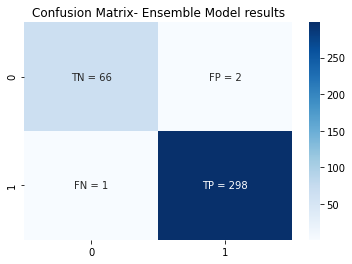

In [63]:
tn, fp, fn, tp = confusion_matrix(y_test,y_test_pred).ravel()
matrix_hyper = np.array([[tn, fp], [fn, tp]])
label_hyper = ['TN = %d' % (tn), 'FP = %d' % (fp),'FN = %d' % (fn),'TP = %d' % (tp)]
label_hyper = np.asarray(label_hyper).reshape(2,2)
ax = plt.axes()
sns.heatmap(matrix_hyper, annot=label_hyper, fmt="", cmap='Blues')
ax.set_title('Confusion Matrix- Ensemble Model results')
plt.show()